In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

In [ ]:
### Read superconductivity data
#sc = pd.read_csv("https://remiller1450.github.io/data/super.csv")
sc = pd.read_csv("super.csv")

## Train-test split
from sklearn.model_selection import train_test_split
train_sc, test_sc = train_test_split(sc, test_size=0.2, random_state=5)

## Split predictors and outcome
train_y_sc = train_sc['critical_temp']
train_X_sc = train_sc.drop(['critical_temp'], axis=1)


1377810

Question 1

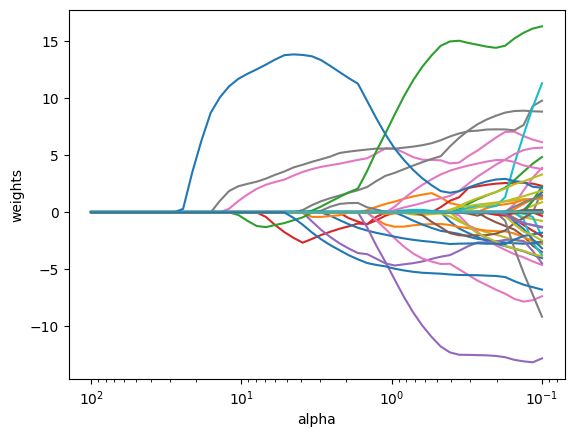

In [6]:
## Part A

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

## Standardize
train_Xs_sc = StandardScaler().fit_transform(train_X_sc)

## Set up sequence of alphas
n_alphas = 50
alphas = np.logspace(-1, 2, n_alphas)

## Find coefficients at each alpha (Ridge regression)
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(train_Xs_sc, train_y_sc)
    coefs.append(lasso.coef_)

## Create Plot
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.axis("tight")
plt.show()

In [7]:
## Part B
## At alpha = 10, four features have non-zero weight values.

In [ ]:
## Part C
from sklearn.linear_model import LassoCV

## Evaluate using 5-fold CV and print the best alpha
ridge_cv_res = LassoCV(cv=5, alphas = alphas).fit(train_Xs_sc, train_y_sc)
best_alpha = ridge_cv_res.alpha_
print(best_alpha)

0.1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', 'passthrough')
])

my_params = {'model': [LinearRegression(), Lasso(alpha=0.1), Ridge(alpha=0.1148)]}

from sklearn.model_selection import GridSearchCV
grid_results = GridSearchCV(my_pipeline, my_params, cv=5, 
                            scoring='neg_root_mean_squared_error'
                            ).fit(train_Xs_sc, train_y_sc)

params_to_print = ['rank_test_score', 'param_model', 'mean_test_score']
pd.DataFrame(grid_results.cv_results_).sort_values(by='rank_test_score')[params_to_print]

,rank_test_score,param_model,mean_test_score
2,1,Ridge(alpha=0.1148),-17.591338
0,2,LinearRegression(),-17.591957
1,3,Lasso(alpha=0.1),-18.396655


In [12]:
## Part E
## The Ridge and Linear Regression models performed better than the Lasso model. 
## At its optimal value of alpha, Lasso only has four non-zero features. 
## Meanwhile Ridge, with its optimal alpha value, still uses most of the features, 
## allowing it to better fit the data.

Question 2

In [14]:
### Read flattened MNIST data
#mnist = pd.read_csv("https://remiller1450.github.io/data/mnist_small.csv")
mnist = pd.read_csv("mnist_small.csv")

## Train-test split
from sklearn.model_selection import train_test_split
train_mnist, test_mnist = train_test_split(mnist, test_size=0.2, random_state=5)

### Separate the label column (outcome)
train_mnist_y = train_mnist['label']
train_mnist_X = train_mnist.drop(['label'], axis="columns")

### Create a binary label for 4's
train_mnist_y_binary = (train_mnist_y == 4).astype(int)

In [ ]:
## Modify and re-fit the logistic regression pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score

new_pipe = Pipeline([
('scaler', MinMaxScaler()),
('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=150))
])

log_mod = new_pipe.fit(train_mnist_X, train_mnist_y_binary)

## Extract the weights and bias from the fitted model
w = log_mod.named_steps['model'].coef_
b = log_mod.named_steps['model'].intercept_

## Calculate the linear predictor using the dot product of X and w + the bias term
lin_predictor = np.dot(MinMaxScaler().fit_transform(train_mnist_X), np.transpose(w)) + b

## Apply the sigmoid transformation
pi = 1/(1 + np.exp(-lin_predictor))

accuracy_score(train_mnist_y, lin_predictor)




/var/folders/t9/d6hj_1dn4kvg2zcldk_r3s2m0000gn/T/ipykernel_16936/1701004427.py:23: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  accuracy_score(train_mnist_y.ravel(), lin_predictor)


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [42]:
train_mnist_y.values

array([2, 1, 2, ..., 3, 1, 2], shape=(4800,))